<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/6_Regresi%C3%B3n_Lineal__Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#Cargar archivo csv desde seaborn
df=sns.load_dataset(name='car_crashes')
df.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [ ]:
#Convertir en dataframe
df= pd.read_csv("car_crashes")
df

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='alcohol', y='total', color="blue", data=df)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [13]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= df[['alcohol']]
Var_Dep= df['total']

In [10]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

**Modelo matemático: y= 2.0325063x + 5.857776154826299**

---




In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

In [ ]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pred= model.predict(X=df[['alcohol', 'speeding']])
y_pred= model.predict(X=df[['alcohol']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred)
df

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='alcohol', y='total', color="blue", data=df)
sns.scatterplot(x='alcohol', y='Predicciones', color="red", data=df)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

In [21]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.8526132163334911

In [23]:
#Eliminamos la columna tipo string
df= df.drop(['abbrev'], axis=1)

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df)

In [25]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df.corr()
Corr_Factors

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


In [26]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,0.199702,0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,0.077675,0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,0.170612,0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,0.174856,0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,0.156895,0.006359
ins_premium,0.199702,0.077675,0.170612,0.174856,0.156895,1.000000,0.623116
ins_losses,0.036011,0.065928,0.112547,0.075970,0.006359,0.623116,1.000000


<Axes: >

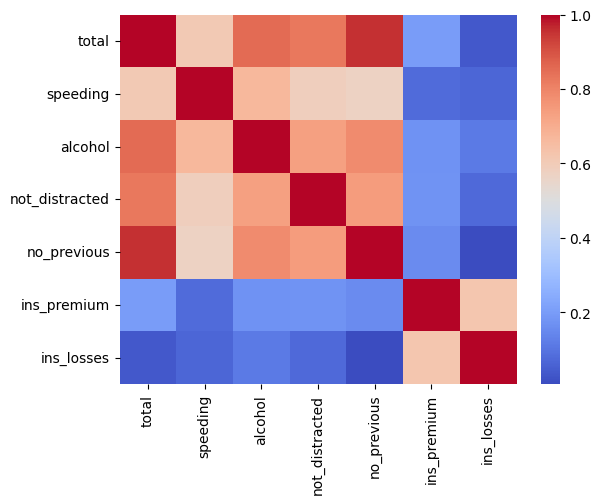

In [31]:
#Graficamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm')  
Heat_Map

<Axes: >

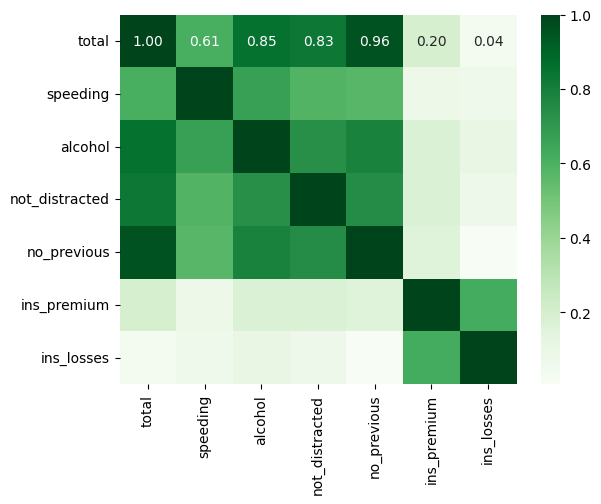

In [42]:
#Ajustamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'Greens', annot=True, fmt=".2f")  
Heat_Map